<a href="https://colab.research.google.com/github/MrJellimann/machine_learning_homework/blob/master/HW2_Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Christopher Walen, COP 4630, Fall 2019**

Problem 3

In this problem you have to work with the CIFAR10 data set. Check out the notebook cifar10_data_set to see how to load it.

Give three convolutional models that

first model underfits
second model overfits
third model is pretty good
Make sure that you plot the curves depicting the training/validation accuracy/loss.

## **Old Version - Issues and many warnings**

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step
shapes

x_train: (50000, 32, 32, 3)
y_train: (50000, 10)
x_test: (10000, 32, 32, 3)
y_test: (10000, 10)


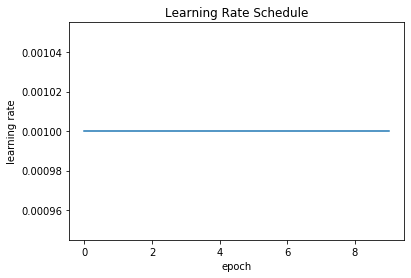















Using real-time data augmentation.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 00001: val_acc improved from -inf to 0.20690, saving model to /content/saved_models/cifar10_ResNet20v1_model.001.h5

Epoch 00002: val_acc improved from 0.20690 to 0.26170, saving model to /content/saved_models/cifar10_ResNet20v1_model.002.h5

Epoch 00003: val_acc improved from 0.26170 to 0.33050, saving model to /content/saved_models/cifar10_ResNet20v1_model.003.h5


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-b3cb569995c6>", line 322, in <module>
    callbacks=callbacks)
  File "/usr/local/lib/python3.6/dist-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1658, in fit_generator
    initial_epoch=initial_epoch)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py", line 215, in fit_generator
    class_weight=class_weight)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1449, in train_on_batch
    outputs = self.train_function(ins)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2979, in __call__
    return self._call(inputs)
  File "/usr/local/lib/python3.6

KeyboardInterrupt: ignored

In [1]:
# import keras

# from keras.datasets import cifar10

# from keras.layers import Dense, Conv2D, BatchNormalization, Activation
# from keras.layers import AveragePooling2D, Input, Flatten

# from keras.optimizers import Adam

# from keras.callbacks import ModelCheckpoint, LearningRateScheduler
# from keras.callbacks import ReduceLROnPlateau

# from keras.preprocessing.image import ImageDataGenerator

# from keras.regularizers import l2

# from keras import backend as K

# from keras import Model

# from keras.utils.vis_utils import model_to_dot

# import numpy as np
# import os
# from IPython.display import SVG
# %matplotlib inline
# import matplotlib.pyplot as plt

# # Training Parameters
# batch_size = 32
# epochs = 10 # default: 200
# data_augmentation = True
# num_classes = 10

# # Subtracting pixel mean improves accuracy
# subtract_pixel_mean = True

# n = 3
# version = 1

# if (version == 1):
#   depth = n * 6 + 2
# elif (version == 2):
#   depth = n * 9 + 2

# model_type = 'ResNet%dv%d' % (depth, version)

# # Load data
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# # Normalize
# x_train = x_train.astype('float32') / 255
# x_test = x_test.astype('float32') / 255

# # Convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

# input_shape = x_train.shape[1:]
# num_train = x_train.shape[0]

# if (subtract_pixel_mean):
#   x_train_mean = np.mean(x_train, axis=0)
#   x_train -= x_train_mean
#   x_test -= x_train_mean

# print('shapes')
# print()
# print('x_train:', x_train.shape)
# print('y_train:', y_train.shape)
# print('x_test:', x_test.shape)
# print('y_test:', y_test.shape)

# def lr_schedule(epoch):
#   """
#   Learning Rate Schedule

#   Learning rate is scheduled to be reduced after 100, 150, 200, 225 epochs.
#   Called automatically every epoch as part of callbacks during training.
  
#   # Argument
#     epoch (int): The number of epochs
    
#   # Returns 
#     lr (float32): learning rate
#   """

#   lr = 1e-3

#   if (epoch > 180):
#     lr *= 0.5e-3
#   elif (epoch > 160):
#     lr *= 1e-3
#   elif (epoch > 120):
#     lr *= 1e-2
#   elif (epoch > 80):
#     lr *= 1e-1
  
#   return lr

# plt.title('Learning Rate Schedule')
# plt.plot(range(epochs), [lr_schedule(epoch) for epoch in range(epochs)])
# plt.ylabel('learning rate')
# plt.xlabel('epoch')
# plt.show()

# def resnet_layer(inputs, 
#                  num_filters=16, 
#                  kernel_size=3, 
#                  strides=1,
#                  activation='relu', 
#                  batch_normalization=True, 
#                  conv_first=True):
#   """2D Convolution-Batch Normalization-Activation stack builder

#     # Arguments
#         inputs (tensor): input tensor from input image or previous layer
#         num_filters (int): Conv2D number of filters
#         kernel_size (int): Conv2D square kernel dimensions
#         strides (int): Conv2D square stride dimensions
#         activation (string): activation name
#         batch_normalization (bool): whether to include batch normalization
#         conv_first (bool): conv-bn-activation (True) or
#             bn-activation-conv (False)

#     # Returns
#         x (tensor): tensor as input to the next layer
#     """
#   conv = Conv2D(num_filters, 
#                 kernel_size=kernel_size, 
#                 strides=strides, 
#                 padding='same', 
#                 kernel_initializer='he_normal', 
#                 kernel_regularizer=l2(1e-4))  
  
#   x = inputs
#   if conv_first:
#     # apply conv layer first
#     x = conv(x)
#     if batch_normalization:
#       x = BatchNormalization()(x)
#     if activation is not None:
#       x = Activation(activation)(x)
#   else:
#     if batch_normalization:
#       x = BatchNormalization()(x)
#     if activation is not None:
#       x = Activation(activation)(x)
#     # apply conv layer last
#     x = conv(x)
      
#   return x  

# def resnet_v1(input_shape, depth, num_classes):
#   """ResNet Version 1 Model builder [a]

#   Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
#   Last ReLU is after the shortcut connection.
#   At the beginning of each stage, the feature map size is halved (downsampled)
#   by a convolutional layer with strides=2, while the number of filters is
#   doubled. Within each stage, the layers use the same type of filters 
#   (in terms of size, stride, padding) and the same number of filters.
#   Features maps sizes:
#   stage 0: 32x32, 16
#   stage 1: 16x16, 32
#   stage 2:  8x8,  64
    
#   # Arguments
#       input_shape (tensor): shape of input image tensor
#       depth (int): number of core convolutional layers
#       num_classes (int): number of classes (CIFAR10 has 10)

#   # Returns
#       model (Model): Keras model instance
#   """
  
#   if (depth - 2) % 6 != 0:
#     raise ValueError('depth should be 6n+2 (eg 20, 32, 44)')
#   # Start model definition
#   num_filters = 1 # default was 16
#   num_res_blocks = int((depth - 2) / 6)
  
#   inputs = Input(shape=input_shape)
#   x = resnet_layer(inputs=inputs)
  
#   # Instantiate the stack of residual inputs
#   for stack in range(3):
#     for res_block in range(num_res_blocks):
      
#       strides = 1
#       if stack > 0 and res_block == 0: 
#         # first layer but not first stack
#         # downsample
#         strides = 2 
        
#       y = resnet_layer(inputs=x, 
#                        num_filters=num_filters,
#                        strides=strides)
#       y = resnet_layer(inputs=y,
#                        num_filters=num_filters,
#                        activation=None)
      
#       if stack > 0 and res_block == 0: 
#         # first layer but not first stack
#         # linear projection residual shortcut connection to match
#         # changed dims
#         x = resnet_layer(inputs=x,
#                          num_filters=num_filters,
#                          kernel_size=1,
#                          strides=strides,
#                          activation=None,
#                          batch_normalization=False)
#       x = keras.layers.add([x,y])
#       x = Activation('relu')(x)
#     num_filters *=2
    
#   # Add classifier on top
#   # v1 does not use BN after last shortcut connection-ReLU
#   x = AveragePooling2D(pool_size=8)(x)
#   y = Flatten()(x)
#   outputs = Dense(num_classes,
#                   activation='softmax',
#                   kernel_initializer='he_normal')(y)
#   # Instantiate model
#   model = Model(inputs=inputs, outputs=outputs)
#   return model

# model = resnet_v1(input_shape, 20, 10)

# model.compile(loss='categorical_crossentropy',
#               optimizer=Adam(lr=lr_schedule(0)),
#               metrics=['accuracy'])

# # Prepare model model saving directory.
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# filepath = os.path.join(save_dir, model_name)

# # Prepare callbacks for model saving and for learning rate adjustment.
# checkpoint = ModelCheckpoint(filepath=filepath,
#                              monitor='val_acc',
#                              verbose=1,
#                              save_best_only=True)

# lr_scheduler = LearningRateScheduler(lr_schedule)

# lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
#                                cooldown=0,
#                                patience=5,
#                                min_lr=0.5e-6)

# callbacks = [checkpoint, lr_reducer, lr_scheduler]

# # Run training, with or without data augmentation.
# if not data_augmentation:
#     print('Not using data augmentation.')
#     history = model.fit(x_train, y_train,
#                         batch_size=batch_size,
#                         epochs=epochs,
#                         validation_data=(x_test, y_test),
#                         shuffle=True,
#                         verbose=0,
#                         callbacks=callbacks)
# else:
#     print('Using real-time data augmentation.')
#     # This will do preprocessing and realtime data augmentation:
#     datagen = ImageDataGenerator(
#         # set input mean to 0 over the dataset
#         featurewise_center=False,
#         # set each sample mean to 0
#         samplewise_center=False,
#         # divide inputs by std of dataset
#         featurewise_std_normalization=False,
#         # divide each input by its std
#         samplewise_std_normalization=False,
#         # apply ZCA whitening
#         zca_whitening=False,
#         # epsilon for ZCA whitening
#         zca_epsilon=1e-06,
#         # randomly rotate images in the range (deg 0 to 180)
#         rotation_range=0,
#         # randomly shift images horizontally
#         width_shift_range=0.1,
#         # randomly shift images vertically
#         height_shift_range=0.1,
#         # set range for random shear
#         shear_range=0.,
#         # set range for random zoom
#         zoom_range=0.,
#         # set range for random channel shifts
#         channel_shift_range=0.,
#         # set mode for filling points outside the input boundaries
#         fill_mode='nearest',
#         # value used for fill_mode = "constant"
#         cval=0.,
#         # randomly flip images
#         horizontal_flip=True,
#         # randomly flip images
#         vertical_flip=False,
#         # set rescaling factor (applied before any other transformation)
#         rescale=None,
#         # set function that will be applied on each input
#         preprocessing_function=None,
#         # image data format, either "channels_first" or "channels_last"
#         data_format=None,
#         # fraction of images reserved for validation (strictly between 0 and 1)
#         validation_split=0.0)

#     # Compute quantities required for featurewise normalization
#     # (std, mean, and principal components if ZCA whitening is applied).
#     datagen.fit(x_train)

#     # Fit the model on the batches generated by datagen.flow().
#     history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
#                                   validation_data=(x_test, y_test),
#                                   shuffle=True,
#                                   epochs=epochs, 
#                                   steps_per_epoch=num_train // batch_size,
#                                   verbose=0, 
#                                   callbacks=callbacks)
    
# # Score trained model.
# # test
# scores = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

# # Score trained model.
# # train
# scores = model.evaluate(x_train, y_train, verbose=1)
# print('Train loss:', scores[0])
# print('Train accuracy:', scores[1])

# model.save('cifar10_ResNet20v1_model.h5')

# model_fname = 'cifar10_ResNet20v1_model.h5' 

# from google.colab import files

# with open(model_fname, 'r') as f:
#   files.download(model_fname)

# np.savez('x_train_mean.npz', x_train_mean=x_train_mean)

# with open('x_train_mean.npz', 'r') as f:
#   files.download('x_train_mean.npz')

# acc = history.history['acc']
# val_acc = history.history['val_acc']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc) + 1)

# # training and validation accuracy

# plt.plot(epochs, acc, 'bo', label='training acc')
# plt.plot(epochs, val_acc, 'r', label='test acc')
# plt.title('training and test accuracy')
# plt.legend()

# plt.figure()

# # training and validation loss

# plt.plot(epochs, loss, 'bo', label='training loss')
# plt.plot(epochs, val_loss, 'r', label='test loss')
# plt.title('training and test loss')
# plt.legend()

# plt.show()

# start_epoch = 0 # default was 60

# # training and validation accuracy

# plt.plot(epochs[start_epoch:], acc[start_epoch:], 'bo', label='training acc')
# plt.plot(epochs[start_epoch:], val_acc[start_epoch:], 'r', label='validation acc')
# plt.title('training and validation accuracy')
# plt.legend()

# plt.figure()

# # training and validation loss

# plt.plot(epochs[start_epoch:], loss[start_epoch:], 'bo', label='training loss')
# plt.plot(epochs[start_epoch:], val_loss[start_epoch:], 'r', label='validation loss')
# plt.title('training and validation loss')
# plt.legend()

# plt.show()

## **New Version - works better**

shapes

x_train: (50000, 32, 32, 3)
y_train: (50000, 10)
x_test : (10000, 32, 32, 3)
y_test : (10000, 10)


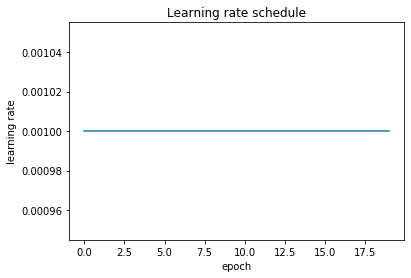

Not using data augmentation.


In [0]:
import keras
from keras.datasets import cifar10

from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

from keras import backend as K
from keras import Model
from keras.utils.vis_utils import model_to_dot

import numpy as np
import os
from IPython.display import SVG
%matplotlib inline
import matplotlib.pyplot as plt

# Training parameters
batch_size = 32
epochs = 20 # default was 200
data_augmentation = False
num_classes = 10

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True

# Model parameters
n = 3
version = 1

# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

# Load the CIFAR10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Input dimensions
input_shape = x_train.shape[1:]

# Number of non-test examples
num_train = x_train.shape[0] 

# If subtract pixel mean is enabled
if subtract_pixel_mean:
  x_train_mean = np.mean(x_train, axis=0)
  x_train -= x_train_mean
  x_test -= x_train_mean

print('shapes')
print()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test :', x_test.shape)
print('y_test :', y_test.shape)

def lr_schedule(epoch):
  """Learning Rate Schedule
  
  Learning rate is scheduled to be reduced after 100, 150, 200, 225 epochs.
  Called automatically every epoch as part of callbacks during training.
  
  # Argument
    epoch (int): The number of epochs
    
  # Returns 
    lr (float32): learning rate
  """
  
  lr = 1e-3
  
  if epoch > 180:
      lr *= 0.5e-3
  elif epoch > 160:
      lr *= 1e-3
  elif epoch > 120:
      lr *= 1e-2
  elif epoch > 80:
      lr *= 1e-1
  
  return lr
  
plt.title('Learning rate schedule')
plt.plot(range(epochs), [lr_schedule(epoch) for epoch in range(epochs)])
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

def resnet_layer(inputs, 
                 num_filters=8, # default was 16 
                 kernel_size=3, 
                 strides=1,
                 activation='relu', 
                 batch_normalization=True, 
                 conv_first=True):
  """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
  conv = Conv2D(num_filters, 
                kernel_size=kernel_size, 
                strides=strides, 
                padding='same', 
                kernel_initializer='he_normal', 
                kernel_regularizer=l2(1e-4))  
  
  x = inputs
  if conv_first:
    # apply conv layer first
    x = conv(x)
    if batch_normalization:
      x = BatchNormalization()(x)
    if activation is not None:
      x = Activation(activation)(x)
  else:
    if batch_normalization:
      x = BatchNormalization()(x)
    if activation is not None:
      x = Activation(activation)(x)
    # apply conv layer last
    x = conv(x)
      
  return x  

def resnet_v1(input_shape, depth, num_classes):
  """ResNet Version 1 Model builder [a]

  Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
  Last ReLU is after the shortcut connection.
  At the beginning of each stage, the feature map size is halved (downsampled)
  by a convolutional layer with strides=2, while the number of filters is
  doubled. Within each stage, the layers use the same type of filters 
  (in terms of size, stride, padding) and the same number of filters.
  Features maps sizes:
  stage 0: 32x32, 16
  stage 1: 16x16, 32
  stage 2:  8x8,  64
    
  # Arguments
      input_shape (tensor): shape of input image tensor
      depth (int): number of core convolutional layers
      num_classes (int): number of classes (CIFAR10 has 10)

  # Returns
      model (Model): Keras model instance
  """
  
  if (depth - 2) % 6 != 0:
    raise ValueError('depth should be 6n+2 (eg 20, 32, 44)')
  # Start model definition
  num_filters = 8 # default was 16
  num_res_blocks = int((depth - 2) / 6)
  
  inputs = Input(shape=input_shape)
  x = resnet_layer(inputs=inputs)
  
  # Instantiate the stack of residual inputs
  for stack in range(3):
    for res_block in range(num_res_blocks):
      
      strides = 1
      if stack > 0 and res_block == 0: 
        # first layer but not first stack
        # downsample
        strides = 2 
        
      y = resnet_layer(inputs=x, 
                       num_filters=num_filters,
                       strides=strides)
      y = resnet_layer(inputs=y,
                       num_filters=num_filters,
                       activation=None)
      
      if stack > 0 and res_block == 0: 
        # first layer but not first stack
        # linear projection residual shortcut connection to match
        # changed dims
        x = resnet_layer(inputs=x,
                         num_filters=num_filters,
                         kernel_size=1,
                         strides=strides,
                         activation=None,
                         batch_normalization=False)
      x = keras.layers.add([x,y])
      x = Activation('relu')(x)
    num_filters *=2
    
  # Add classifier on top
  # v1 does not use BN after last shortcut connection-ReLU
  x = AveragePooling2D(pool_size=8)(x)
  y = Flatten()(x)
  outputs = Dense(num_classes,
                  activation='softmax',
                  kernel_initializer='he_normal')(y)
  # Instantiate model
  model = Model(inputs=inputs, outputs=outputs)
  return model

model = resnet_v1(input_shape, 20, 10)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])

# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        shuffle=True,
                        verbose=0,
                        callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                                  validation_data=(x_test, y_test),
                                  shuffle=True,
                                  epochs=epochs, 
                                  steps_per_epoch=num_train // batch_size,
                                  verbose=0, 
                                  callbacks=callbacks)
    
# Score trained model.
# test
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

# Score trained model.
# train
scores = model.evaluate(x_train, y_train, verbose=1)
print('Train Loss:', scores[0])
print('Train Accuracy:', scores[1])

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Training and Validation accuracy

plt.plot(epochs, acc, 'go', label='Training Accuracy')
plt.plot(epochs, val_acc, 'm', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.figure()

# Training and Validation loss

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'm', label='Test Loss')
plt.title('Training and Test Loss')
plt.legend()

plt.show()

start_epoch = 0